
# **Identify Customer Segments For Online Retail With The Use Of K-Means Clustering**

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **Data**

In [7]:
# load the data
data = pd.read_csv('Online_Retail.csv') 
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
#information about data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
#describe the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
#count number of missing values in which columns
nan_counts = data.isnull().sum()
nan_counts

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# find unique values of a columns
print(data['StockCode'].unique())
print(data['InvoiceDate'].unique())
print(data['CustomerID'].unique())
print(data['Country'].unique())

['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['12/1/2010 8:26' '12/1/2010 8:28' '12/1/2010 8:34' ... '12/9/2011 12:31'
 '12/9/2011 12:49' '12/9/2011 12:50']
[17850. 13047. 12583. ... 13298. 14569. 12713.]
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [12]:
# find the no. of unique value count
print(data['StockCode'].value_counts())
print(data['InvoiceDate'].value_counts())
print(data['CustomerID'].value_counts())
print(data['Country'].value_counts())

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64
10/31/2011 14:41    1114
12/8/2011 9:28       749
12/9/2011 10:03      731
12/5/2011 17:24      721
6/29/2011 15:58      705
                    ... 
9/28/2011 9:57         1
9/28/2011 9:45         1
3/16/2011 12:13        1
3/16/2011 12:22        1
3/16/2011 15:58        1
Name: InvoiceDate, Length: 23260, dtype: int64
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002


# Fill missing values

In [13]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Fill missing CustomerID values based on InvoiceDate
data['CustomerID'] = data.groupby('InvoiceDate')['CustomerID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else -1))

# Fill missing Description with a placeholder
data['Description'] = data.groupby('InvoiceNo')['Description'].transform
(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'No Description'))
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [14]:

nan_counts = data.isnull().sum()
nan_counts

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,<bound method SeriesGroupBy.transform of <pand...,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,<bound method SeriesGroupBy.transform of <pand...,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,<bound method SeriesGroupBy.transform of <pand...,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,<bound method SeriesGroupBy.transform of <pand...,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,<bound method SeriesGroupBy.transform of <pand...,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:

# drop duplicates
data = data.drop_duplicates()

In [17]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,<bound method SeriesGroupBy.transform of <pand...,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,<bound method SeriesGroupBy.transform of <pand...,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,<bound method SeriesGroupBy.transform of <pand...,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,<bound method SeriesGroupBy.transform of <pand...,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,<bound method SeriesGroupBy.transform of <pand...,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536639.000000,536639.000000,536639.000000
mean,9.619500,4.632660,11714.505984
std,219.130206,97.233299,6635.230022
min,-80995.000000,-11062.060000,-1.000000
25%,1.000000,1.250000,12471.000000
50%,3.000000,2.080000,14428.000000
75%,10.000000,4.130000,16326.000000
max,80995.000000,38970.000000,18287.000000


# **Using Behavioral Segmentation**
*Behavioral segmentation is used in marketing to divide customers into groups based on their behavior patterns as they interact with a company. Here are the key reasons why behavioral segmentation is particularly valuable*


**1. Improved Targeting and Personalization**

**2. Increased Customer Retention**

**3. Optimized Marketing Spend**

**4. Enhanced Product Development**

**5. Better Customer Experience**

**6. Competitive Advantage**

In [19]:
# Calculate TotalSpend
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

# Calculate Frequency
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Calculate Recency
max_date = data['InvoiceDate'].max()
recency = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (max_date - recency['InvoiceDate']).dt.days
recency = recency[['CustomerID', 'Recency']]

# Calculate TotalSpend per customer
total_spend = data.groupby('CustomerID')['TotalSpend'].sum().reset_index()

# Calculate Quantity per customer
quantity = data.groupby('CustomerID')['Quantity'].sum().reset_index()

# Merge all features into a single DataFrame
customer_data = pd.merge(frequency, recency, on='CustomerID')
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, quantity, on='CustomerID')



# Aggregate data to customer level
#customer_data = data.groupby('CustomerID').agg({'Quantity': 'sum','TotalSpend': 'sum','InvoiceNo': 'nunique',  # Frequency'InvoiceDate': 'max'  # For Recency}).reset_index()

# Calculate Frequency and Recency
#customer_data.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
#customer_data['Recency'] = (data['InvoiceDate'].max() - customer_data['InvoiceDate']).dt.days

# Drop unnecessary columns
#customer_data = customer_data[['CustomerID', 'Quantity', 'TotalSpend', 'Frequency', 'Recency']]

# Inspect the resulting dataframe
customer_data



C:\Users\saura\AppData\Local\Temp\ipykernel_12004\943104250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSpend'] = data['Quantity'] * data['UnitPrice']


,CustomerID,Frequency,Recency,TotalSpend,Quantity
0,-1.0,3294,0,1342813.57,251587
1,12346.0,2,325,0.00,0
2,12347.0,7,1,4310.00,2458
3,12348.0,4,74,1797.24,2341
4,12349.0,1,18,1757.55,631
...,...,...,...,...,...
4368,18280.0,1,277,180.60,45
4369,18281.0,1,180,80.82,54
4370,18282.0,3,7,176.60,98
4371,18283.0,16,3,2045.53,1357


# **Handle Outliers**

In [20]:
def detect_outliers(data, columns):
    outliers = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers.extend(outlier_indices)
    return list(set(outliers))

# Identify outliers in relevant columns
outliers = detect_outliers(customer_data, ['Quantity', 'TotalSpend', 'Frequency', 'Recency'])

# Remove outliers from the dataset
customer_data_cleaned = customer_data.drop(outliers)

print(f"Original dataset size: {customer_data.shape[0]}")
print(f"Dataset size after removing outliers: {customer_data_cleaned.shape[0]}")


Original dataset size: 4373
Dataset size after removing outliers: 3663


In [21]:
customer_data_cleaned

,CustomerID,Frequency,Recency,TotalSpend,Quantity
1,12346.0,2,325,0.00,0
4,12349.0,1,18,1757.55,631
5,12350.0,1,309,334.40,197
6,12352.0,11,35,1545.41,470
7,12353.0,1,203,89.00,20
...,...,...,...,...,...
4367,18278.0,1,73,173.90,66
4368,18280.0,1,277,180.60,45
4369,18281.0,1,180,80.82,54
4370,18282.0,3,7,176.60,98


# **Normalize and Standardize the Data**
*- Standardize the data to ensure that each feature contributes equally to the distance calculations in K-Means.*

*- Use StandardScaler from sklearn.preprocessing to standardize the features.*

In [22]:
from sklearn.preprocessing import StandardScaler

# Assuming customer_data_cleaned is the cleaned dataset
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
customer_data_scaled = scaler.fit_transform(customer_data_cleaned[['Quantity', 'TotalSpend', 'Frequency', 'Recency']])


# **Applying K-means Clustering**
*K-means clustering is an unsupervised machine learning algorithm used to partition data into distinct groups or clusters. In the context of e-commerce data, K-means clustering can help identify different customer segments based on purchasing behavior.*

D:\ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


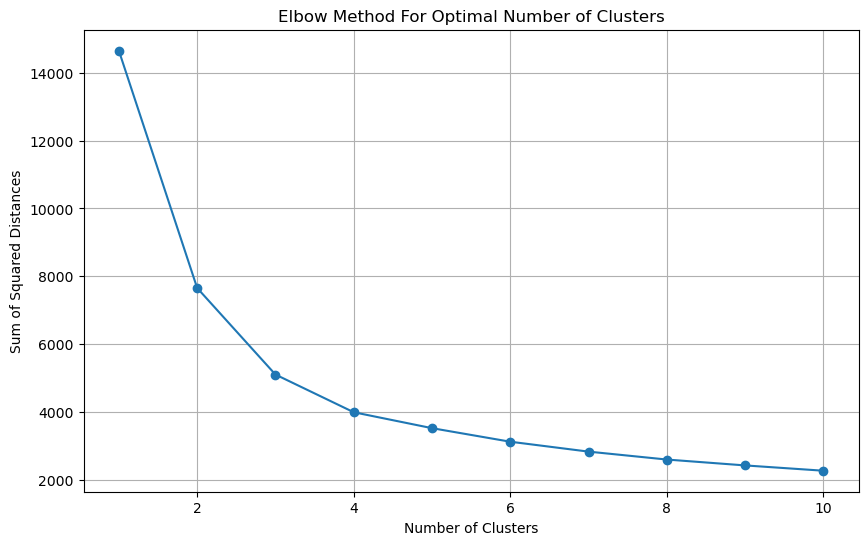

Silhouette Score for K = 4: 0.3921842662394899


In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(customer_data_scaled)
    sse.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Assuming the optimal number of clusters is found to be 4 (as an example)
optimal_k = 4

# Fit the K-means model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
customer_data_cleaned['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Calculate silhouette score for the optimal K
silhouette_avg = silhouette_score(customer_data_scaled, customer_data_cleaned['Cluster'])
print(f"Silhouette Score for K = {optimal_k}: {silhouette_avg}")


# **Visualize the clusters** 
*- Plot the clusters to visualize how the data points are grouped.*

*- Use scatter plots and color the points by their cluster labels.*

*- Optionally, visualize the centroids of each cluster.*

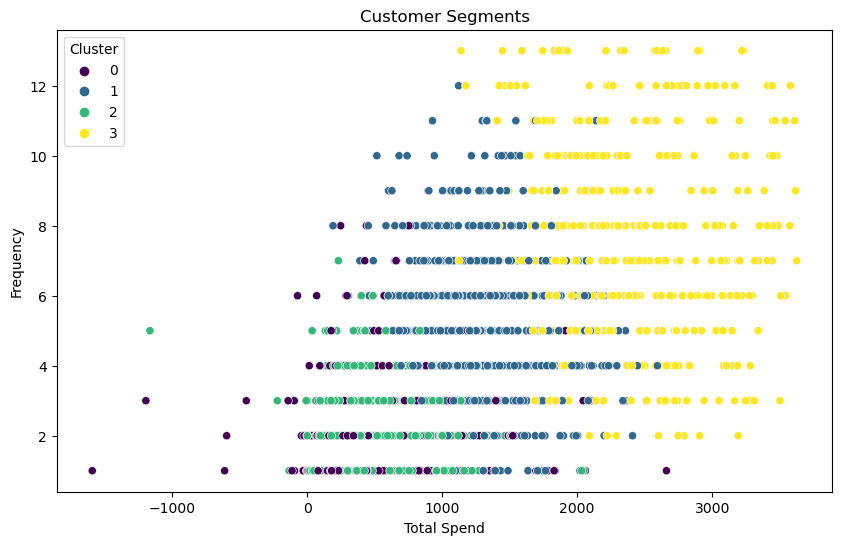

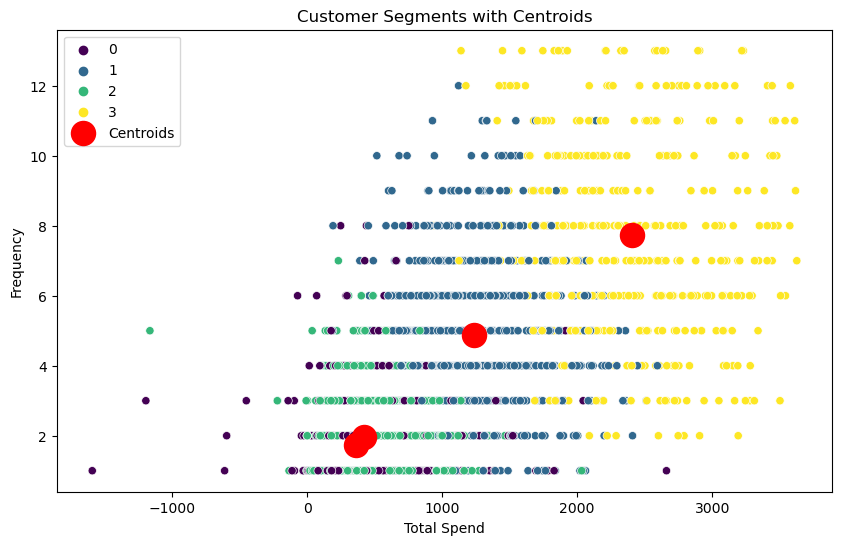

In [24]:
import seaborn as sns

# Visualizing the clusters using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data_cleaned['TotalSpend'], y=customer_data_cleaned['Frequency'], hue=customer_data_cleaned['Cluster'], palette='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Customer Segments')
plt.show()

# Optionally, visualize the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)  # Inverse tr ansform to get the original scale

plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data_cleaned['TotalSpend'], y=customer_data_cleaned['Frequency'], hue=customer_data_cleaned['Cluster'], palette='viridis')
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='red', label='Centroids')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Customer Segments with Centroids')
plt.legend()
plt.show()


# Let's implement a PCA-based clustering model(Principal Component Analysis)

**PCA-based clustering model as an alternative to K-means clustering and Agglomerative Clustering. Principal Component Analysis (PCA) will be used for dimensionality reduction before applying the clustering algorithm. This can help in visualizing the data and potentially improving the clustering performance.**

Silhouette Score for PCA-based K-means Clustering: 0.4845204055611249


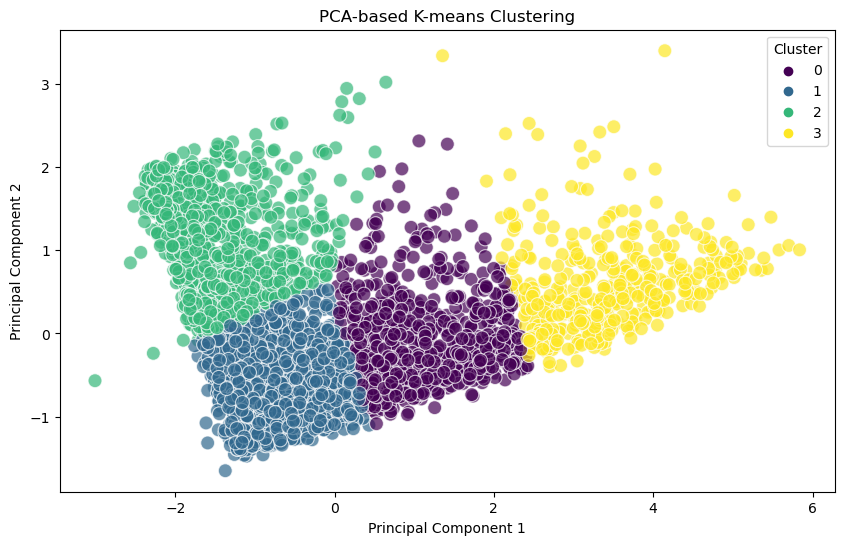

In [44]:
# PCA transformation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_data_scaled)

# Convert to DataFrame
pca_data = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# K-means clustering
kmeans_pca = KMeans(n_clusters=4, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(pca_data)

# Calculate Silhouette Score
silhouette_avg_pca = silhouette_score(pca_data, cluster_labels_pca)
print(f'Silhouette Score for PCA-based K-means Clustering: {silhouette_avg_pca}')

# Add cluster labels to PCA DataFrame
pca_data['Cluster'] = cluster_labels_pca

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('PCA-based K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# **Assign Cluster Labels to the Original Data**

*- Add the cluster labels as a new column to the original dataset.*

*- This will help in understanding the characteristics of each cluster.*

In [37]:
# Merge the cluster labels with the original dataset
original_data_with_clusters = data.merge(customer_data_cleaned[['CustomerID', 'Cluster']], on='CustomerID', how='left')

# Inspect the merged dataframe
original_data_with_clusters.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend,Cluster
0,536365,85123A,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,NaN
1,536365,71053,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,NaN
2,536365,84406B,<bound method SeriesGroupBy.transform of <pand...,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,NaN
3,536365,84029G,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,NaN
4,536365,84029E,<bound method SeriesGroupBy.transform of <pand...,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,NaN


# **Analyze Each Segment**

*- Calculate summary statistics for each cluster to understand the characteristics of the customers in each segment.*

*- Mean, median, and standard deviation of features within each cluster.*

*- Compare the segments based on these statistics to identify distinctive features.*


In [39]:
# Add cluster labels to original data
customer_data_cleaned['Cluster'] = cluster_labels_pca

# Calculate summary statistics for each cluster
cluster_summary_pca = customer_data_cleaned.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'TotalSpend': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'Recency': ['mean', 'median', 'std']
}).reset_index()

cluster_summary_pca

Cluster     Quantity                       TotalSpend                        \
                  mean  median         std         mean    median         std   
0       0   761.522479   738.0  300.234360  1261.501508  1221.560  404.065257   
1       1   242.273022   219.0  159.716983   418.790241   379.835  254.457138   
2       2   196.960362   144.0  181.004346   364.571212   297.780  326.166048   
3       3  1432.850602  1419.0  372.101042  2417.191014  2369.160  565.878019   

  Frequency                      Recency                    
       mean median       std        mean median        std  
0  4.843256    5.0  2.025020   45.252734   29.0  44.879935  
1  2.033074    2.0  1.147554   48.738003   43.0  36.075990  
2  1.708947    1.0  1.090153  231.072480  233.0  54.101686  
3  7.845783    8.0  2.794979   35.754217   21.0  44.649113

# **Profile the Customer Segments**

*- Create profiles for each customer segment based on the analysis.*

*- Describe the typical customer in each segment (e.g., demographics, purchasing behavior).*

*- Use visualization techniques (e.g., bar charts, box plots) to illustrate the differences between segments.*

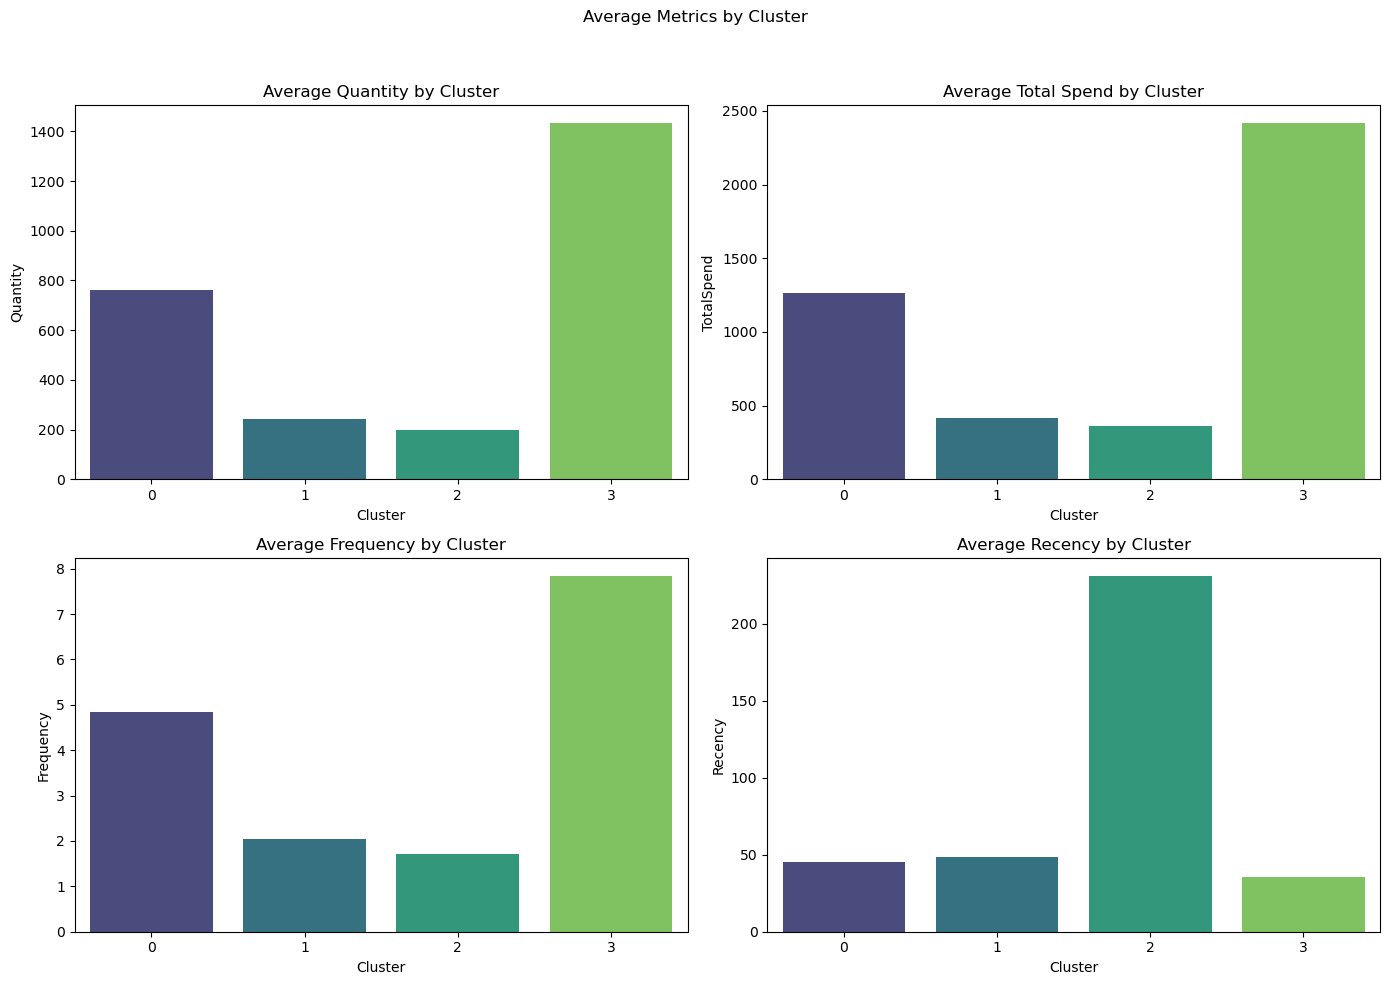

In [40]:
# Average values for each cluster
cluster_avg = customer_data_cleaned.groupby('Cluster').mean().reset_index()

# Plot bar charts for each feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Average Metrics by Cluster')

sns.barplot(ax=axes[0, 0], x='Cluster', y='Quantity', data=cluster_avg, palette='viridis')
axes[0, 0].set_title('Average Quantity by Cluster')

sns.barplot(ax=axes[0, 1], x='Cluster', y='TotalSpend', data=cluster_avg, palette='viridis')
axes[0, 1].set_title('Average Total Spend by Cluster')

sns.barplot(ax=axes[1, 0], x='Cluster', y='Frequency', data=cluster_avg, palette='viridis')
axes[1, 0].set_title('Average Frequency by Cluster')

sns.barplot(ax=axes[1, 1], x='Cluster', y='Recency', data=cluster_avg, palette='viridis')
axes[1, 1].set_title('Average Recency by Cluster')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


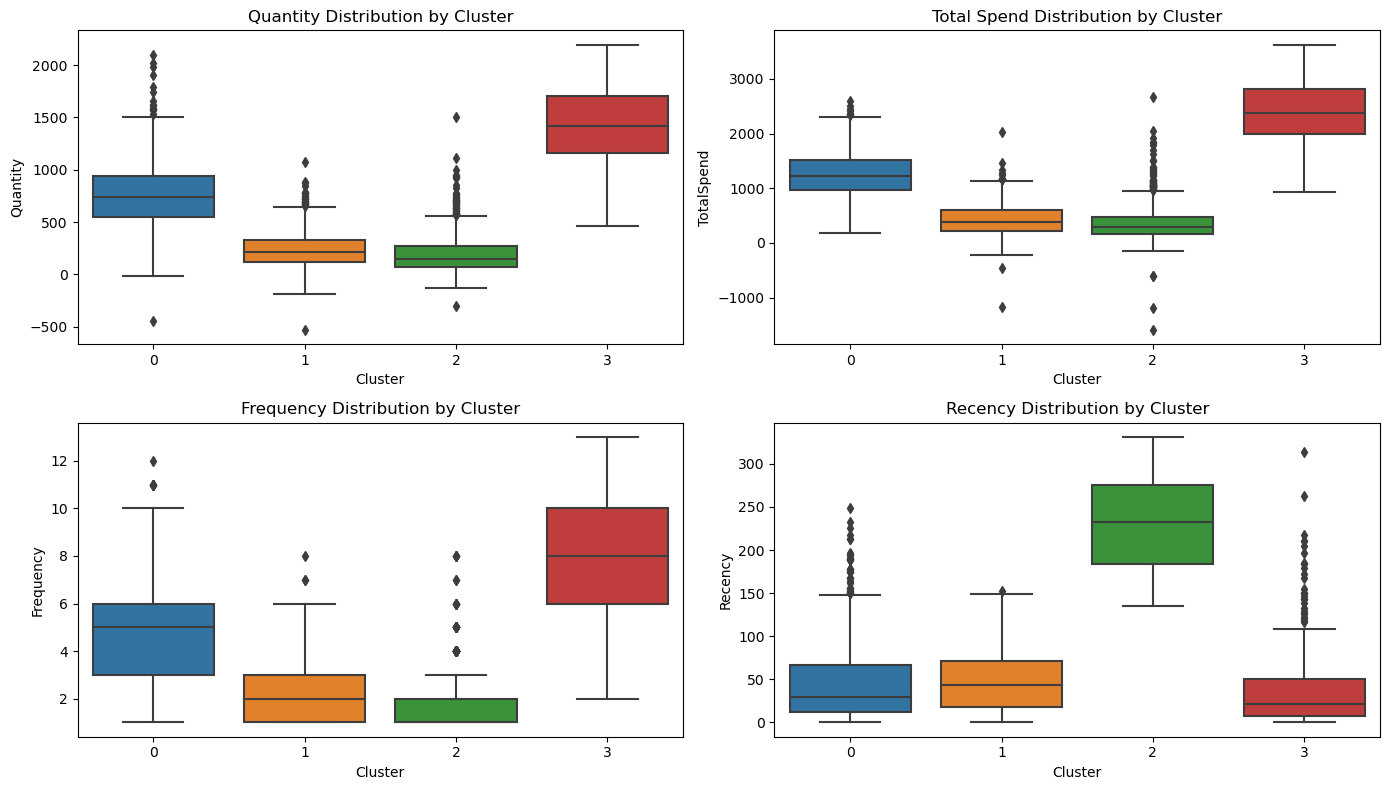

In [41]:
# Visualization using box plots
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Quantity', data=customer_data_cleaned)
plt.title('Quantity Distribution by Cluster')

plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='TotalSpend', data=customer_data_cleaned)
plt.title('Total Spend Distribution by Cluster')

plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Frequency', data=customer_data_cleaned)
plt.title('Frequency Distribution by Cluster')

plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='Recency', data=customer_data_cleaned)
plt.title('Recency Distribution by Cluster')

plt.tight_layout()
plt.show()